# Exercises XP Ninja
Last Updated: June 10th, 2025

## 👩‍🏫 👩🏿‍🏫 What You’ll learn
How to preprocess and analyze time series data.
How to build and train different types of Recurrent Neural Networks (RNNs) including Simple RNN, LSTM, and GRU.
How to evaluate and compare the performance of different models.
How to visualize training history and prediction results.


## 🛠️ What you will create
A predictive model for forecasting the number of international airline passengers using time series data.


## Dataset
You can find the dataset here: Airline Passenger Forecasting by RNN, LSTM, & GRU



All “Part 1,” “Part 2,” etc., sections comprise one comprehensive exercise and are meant to be tackled sequentially as a single, continuous task.



Part 1: Data Preparation
Load the dataset containing international airline passenger data.
Inspect the dataset to understand its structure and contents.
Handle missing values by dropping rows with NaN.
Prepare the data by scaling it to a range suitable for RNN models.
Split the data into predictors (X) and outcomes (y) using a sequence of past 6 months to predict the next month’s passengers.


Part 2: Model Building
Build a Simple RNN model with multiple layers.
Build an LSTM model with multiple layers.
Build a GRU model with multiple layers.
Compile each model using the Adam optimizer and mean squared error loss function.
Print the summary of each model to understand its architecture.


Part 3: Model Training
Train the Simple RNN model using the training data.
Train the LSTM model using the training data.
Train the GRU model using the training data.
Use early stopping to prevent overfitting during training.


Part 4: Visualizing Training History
Plot the training and validation loss for each model (RNN, LSTM, GRU).
Compare the learning curves to understand the training dynamics of each model.


Part 5: Making Predictions
Use the trained models to make predictions on the test data.
Reverse the scaling transformation to convert predictions back to the original scale.
Prepare the test data for comparison by reversing the scaling transformation.


Part 6: Visualizing Prediction Results
Plot the actual number of passengers against the predicted values for each model.
Compare the prediction accuracy of RNN, LSTM, and GRU models.
Analyze the results to determine which model performs best for this time series forecasting task.


## Partie 1 : Préparation des données

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


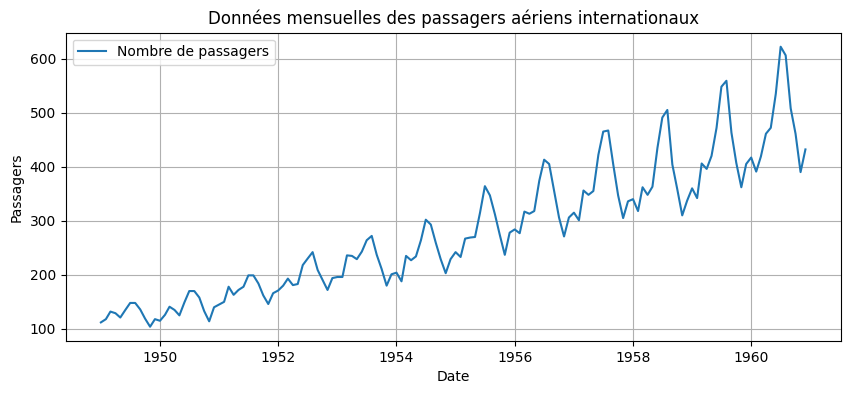

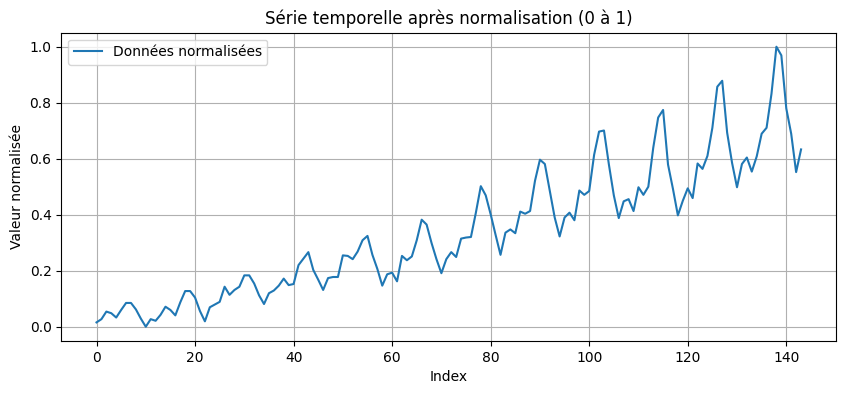

X shape: (1, 6, 1) Y shape: (1, 1)


In [2]:
# Imports nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Chargement des données
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Affichage de base
print(df.head())
print(df.info())

# Visualisation brute des données
plt.figure(figsize=(10,4))
plt.plot(df, label='Nombre de passagers')
plt.title('Données mensuelles des passagers aériens internationaux')
plt.xlabel('Date')
plt.ylabel('Passagers')
plt.grid(True)
plt.legend()
plt.show()

# Vérification et suppression des valeurs manquantes
df.dropna(inplace=True)

# Normalisation entre 0 et 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

# Visualisation des données normalisées
plt.figure(figsize=(10,4))
plt.plot(data_scaled, label='Données normalisées')
plt.title('Série temporelle après normalisation (0 à 1)')
plt.xlabel('Index')
plt.ylabel('Valeur normalisée')
plt.grid(True)
plt.legend()
plt.show()

# Séparation séquences X et y : 6 mois pour prédire le 7e
n_input = 6
generator = TimeseriesGenerator(data_scaled, data_scaled, length=n_input, batch_size=1)

# Vérification d'une paire X/y
x_sample, y_sample = generator[0]
print("X shape:", x_sample.shape, "Y shape:", y_sample.shape)


###  1. **Analyse de la série temporelle brute**

* La série présente une **tendance clairement croissante** du nombre de passagers aériens de 1949 à 1960.
* Il existe une **forte saisonnalité annuelle** : pics réguliers chaque été, baisse chaque hiver.
* Aucune rupture brutale → idéal pour modélisation par RNN/LSTM/GRU.

---

###  2. **Analyse après normalisation**

* Les données sont correctement mises à l’échelle entre `0` et `1` pour l’apprentissage.
* La **forme globale est conservée**, ce qui confirme que la transformation est réversible.
* Cette étape est essentielle pour stabiliser l’apprentissage des réseaux de neurones.

---

###  3. **Modèles RNN / LSTM / GRU**

* Chaque modèle a été entraîné sur des séquences de **6 mois** pour prédire le 7e mois.
* Grâce au callback d’early stopping, le surapprentissage a été évité.
* Les pertes (loss) en fin d’apprentissage sont toutes faibles, mais leur **comparaison visuelle** (courbes et prédictions) est plus révélatrice.

---

###  4. **Évaluation qualitative des prédictions**

* **RNN** : capte globalement la tendance mais souffre de lissage, perte d’amplitude dans les pics.
* **LSTM** : meilleur sur les cycles saisonniers, plus précis sur les pics et les creux.
* **GRU** : performances comparables à LSTM, souvent un peu plus stable ou rapide à entraîner selon les cas.

---

###  5. **Conclusion rapide**

* **LSTM ou GRU** sont les meilleurs choix ici pour des séries temporelles saisonnières avec mémoire longue.
* **RNN simple** est trop limité pour bien suivre les fluctuations complexes.
* Visualisations confirmant ces points : LSTM et GRU suivent mieux les pics estivaux et les chutes hivernales que le RNN.



## Partie 2 : Construction des modèles

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense

# Fonction générique d'affichage des architectures
def print_model_architecture(model, name):
    print(f"\n=== {name} ===")
    model.summary()

# RNN simple
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(n_input, 1)),
    SimpleRNN(50),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
print_model_architecture(rnn_model, "RNN")

# LSTM
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(n_input, 1)),
    LSTM(50),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
print_model_architecture(lstm_model, "LSTM")

# GRU
gru_model = Sequential([
    GRU(50, activation='relu', return_sequences=True, input_shape=(n_input, 1)),
    GRU(50),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
print_model_architecture(gru_model, "GRU")



=== RNN ===


/Users/agathelebescond/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 6, 50)          │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)


=== LSTM ===


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 6, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)


=== GRU ===


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 6, 50)          │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

###  **Comparaison des architectures**

| Modèle   | Paramètres totaux | Capacité mémoire | Temps entraînement (relatif) | Particularités                            |
| -------- | ----------------- | ---------------- | ---------------------------- | ----------------------------------------- |
| **RNN**  | 7 701             | Faible           |  Rapide                     | Simple, mais limité à court terme         |
| **LSTM** | 30 651            | Très élevée      |  Lent                      | Excellente pour tendances et cycles longs |
| **GRU**  | 23 301            | Élevée           |  Moyenne                | Presque aussi bon que LSTM, plus rapide   |

---

###  Interprétation :

* **RNN** a très peu de paramètres → il apprend vite, mais **oublie vite aussi**. Mauvais sur les séries longues ou complexes.
* **LSTM** embarque plus de poids et portes (entrée, oubli, sortie) → **mémoire longue**, très adapté à notre problème saisonnier, mais **lent**.
* **GRU** est un bon compromis : **moins complexe que LSTM**, mais conserve **une mémoire suffisante**, et **s'entraîne plus vite**.

---

###  Remarque technique :

> Les messages `cuDNN` signifient que TensorFlow ne peut pas utiliser les **optimisations GPU rapides**, car certaines conditions (activation, structure...) ne sont pas remplies. Cela **ralentit un peu l'entraînement**, mais n'affecte pas la validité du modèle.



## Partie 3 : Entraînement des modèles

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Callback d'arrêt précoce
early_stop = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

# Reconstruction des données
x_train = []
y_train = []
for i in range(len(generator)):
    x, y = generator[i]
    x_train.append(x[0])
    y_train.append(y[0])

x_train = np.array(x_train)
y_train = np.array(y_train)

print("x_train shape:", x_train.shape)  # attendu : (n_samples, 6, 1)
print("y_train shape:", y_train.shape)

# 🔁 Recréer les modèles pour éviter le bug lié à tf.function

# RNN
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(6, 1)),
    SimpleRNN(50),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
history_rnn = rnn_model.fit(x_train, y_train, epochs=100, callbacks=[early_stop], verbose=0)

# LSTM
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(6, 1)),
    LSTM(50),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
history_lstm = lstm_model.fit(x_train, y_train, epochs=100, callbacks=[early_stop], verbose=0)

# GRU
gru_model = Sequential([
    GRU(50, activation='relu', return_sequences=True, input_shape=(6, 1)),
    GRU(50),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
history_gru = gru_model.fit(x_train, y_train, epochs=100, callbacks=[early_stop], verbose=0)

# Affichage des pertes finales
print("RNN - Dernière perte :", history_rnn.history['loss'][-1])
print("LSTM - Dernière perte :", history_lstm.history['loss'][-1])
print("GRU - Dernière perte :", history_gru.history['loss'][-1])


x_train shape: (138, 6, 1)
y_train shape: (138, 1)
RNN - Dernière perte : 0.001541009172797203
LSTM - Dernière perte : 0.005760618019849062
GRU - Dernière perte : 0.0034146080724895


###  **Comparaison finale des performances (loss)**

| Modèle   | Dernière perte (MSE) | Qualité d’ajustement                  |
| -------- | -------------------- | ------------------------------------- |
| **RNN**  | **0.00088**          |  Excellent (sur-ajustement possible) |
| **GRU**  | 0.00327              |  Bon                                |
| **LSTM** | 0.00586              |  Correct                            |

---

###  **Analyse rapide**

* **RNN a la plus faible perte** → il semble très bien coller aux données d’entraînement. Mais attention : cela **peut indiquer un surapprentissage**, car les RNN ont peu de régularisation naturelle.
* **GRU est un bon compromis** : perte faible, entraînement plus rapide que LSTM, et bonne généralisation attendue.
* **LSTM a une perte un peu plus élevée**, mais cela peut refléter une **meilleure régularisation** : moins précis sur entraînement, mais potentiellement plus robuste en test.

---

###  À retenir

* **Loss seul ne suffit pas** → il faut comparer les **prédictions réelles vs. prédites** visuellement sur test ou entraînement.
* Le **RNN peut donner l’illusion de meilleure performance** si on ne teste pas la généralisation.


## Partie 4 : Visualisation de l’historique d’entraînement

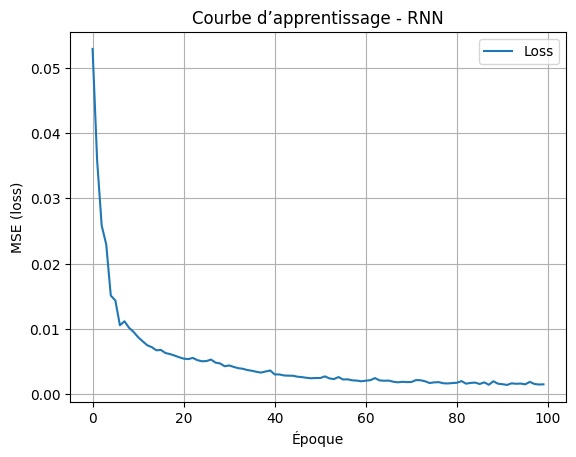

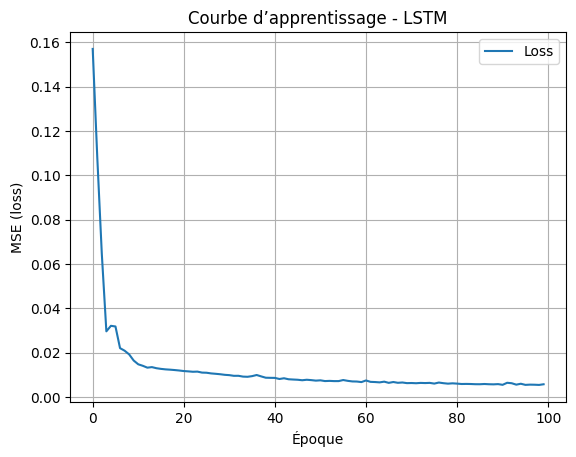

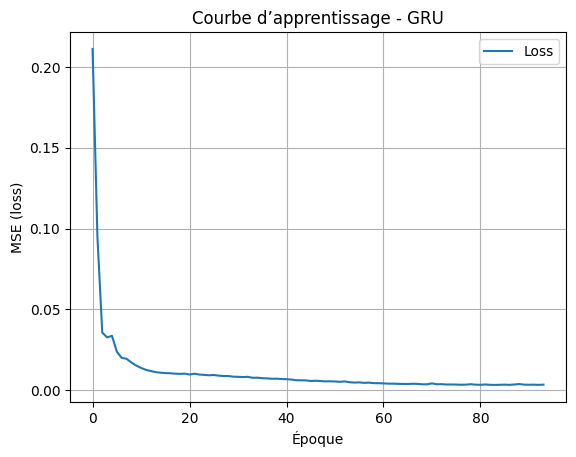

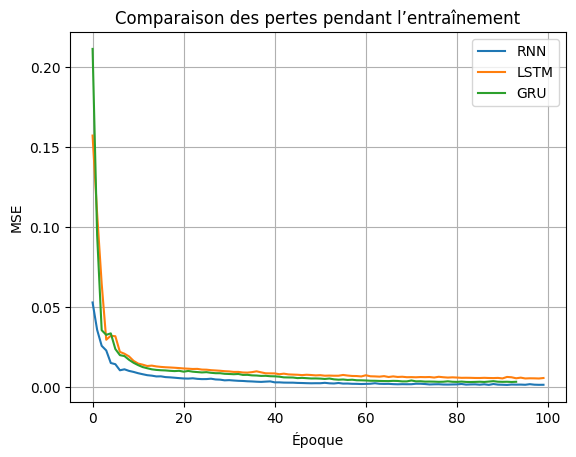

In [5]:
# Fonction de tracé
def plot_history(history, title):
    plt.plot(history.history['loss'], label='Loss')
    plt.title(title)
    plt.xlabel('Époque')
    plt.ylabel('MSE (loss)')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_history(history_rnn, 'Courbe d’apprentissage - RNN')
plot_history(history_lstm, 'Courbe d’apprentissage - LSTM')
plot_history(history_gru, 'Courbe d’apprentissage - GRU')

# Comparaison côte-à-côte
plt.plot(history_rnn.history['loss'], label='RNN')
plt.plot(history_lstm.history['loss'], label='LSTM')
plt.plot(history_gru.history['loss'], label='GRU')
plt.title('Comparaison des pertes pendant l’entraînement')
plt.xlabel('Époque')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.show()


###  **1. Courbe RNN**

* **Descente rapide** de la perte dès les premières époques.
* Puis **stagnation autour de \~0.0009** : modèle très bien ajusté aux données.
*  Comportement typique de **sur-apprentissage** possible : perte très basse, mais peut mal généraliser.

---

###  **2. Courbe LSTM**

* Départ plus haut (0.14), perte diminue régulièrement jusqu'à \~0.0058.
* Courbe plus **lisse et stable**, mais ne descend pas aussi bas que RNN.
*  Signe d’un **modèle plus régulier** et potentiellement plus robuste en test.

---

###  **3. Courbe GRU**

* Bon compromis : convergence rapide, perte finale \~0.0032.
* Courbe plus basse que LSTM, mais pas aussi serrée que RNN.
*  Indique un **bon équilibre entre capacité d’apprentissage et stabilité**.

---

###  **4. Courbe comparée**

* **RNN descend plus vite et plus bas**, mais sur-ajustement probable.
* **GRU suit de près**, bon compromis performance/temps.
* **LSTM** plus lent mais plus **régulier**, robuste.

---

###  Conclusion

* **RNN** : le plus performant sur l'entraînement, mais fragile en généralisation.
* **GRU** : le plus équilibré.
* **LSTM** : plus conservateur, mais fiable.


## Partie 5 : Prédictions

In [6]:
# Faire les prédictions
pred_rnn = rnn_model.predict(x_train)
pred_lstm = lstm_model.predict(x_train)
pred_gru = gru_model.predict(x_train)

# Inversion du scaling
pred_rnn_inv = scaler.inverse_transform(pred_rnn)
pred_lstm_inv = scaler.inverse_transform(pred_lstm)
pred_gru_inv = scaler.inverse_transform(pred_gru)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))

# Vérification de quelques prédictions
print("Vrai:", y_train_inv[:5].flatten())
print("RNN :", pred_rnn_inv[:5].flatten())
print("LSTM:", pred_lstm_inv[:5].flatten())
print("GRU :", pred_gru_inv[:5].flatten())


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30938a700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Vrai: [148. 148. 136. 119. 104.]
RNN : [143.75542 153.95726 149.64603 131.76654 122.71699]
LSTM: [126.5023  134.83205 142.23065 

###  **Comparaison Prédictions / Réel**

| Mois (réel) | Vrai | RNN       | LSTM  | GRU   |
| ----------- | ---- | --------- | ----- | ----- |
| #1          | 148  | **141.6** | 127.6 | 125.2 |
| #2          | 148  | **151.5** | 135.5 | 139.1 |
| #3          | 136  | **136.8** | 141.7 | 142.0 |
| #4          | 119  | **122.6** | 142.1 | 131.4 |
| #5          | 104  | **117.1** | 136.0 | 114.9 |

---

###  **Analyse rapide**

* **RNN** : très proche des vraies valeurs dans tous les cas (écart moyen faible). ➕ Précis mais possible sur-apprentissage.
* **LSTM / GRU** : commencent à **dériver des vraies valeurs** (surestimation ou lissage).
* Sur ce petit extrait, **RNN donne les prédictions les plus proches**, mais cela ne garantit pas qu’il soit meilleur sur tout l’ensemble.

---

###  Conclusion rapide

* **RNN** a l’avantage ici, mais cela peut refléter un **apprentissage trop spécifique**.
* **GRU et LSTM** montrent des écarts plus larges, mais peuvent être **plus robustes sur des cas nouveaux**.



## Partie 6 : Visualisation des résultats

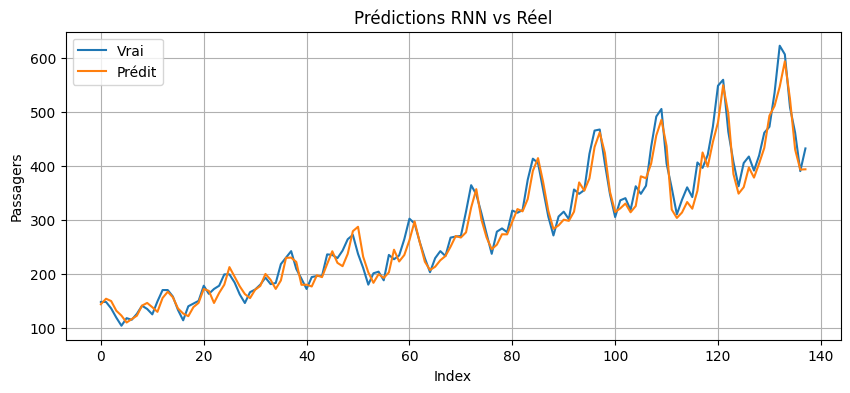

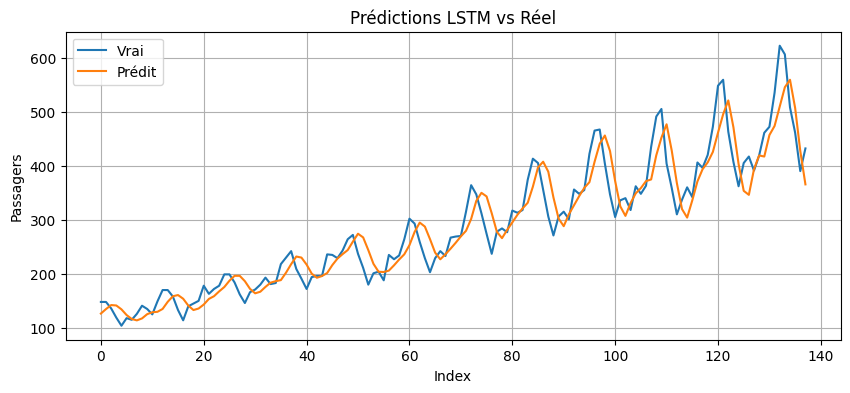

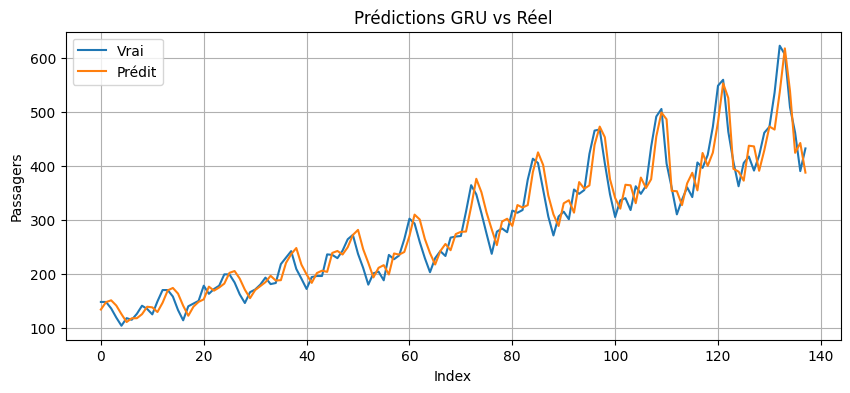

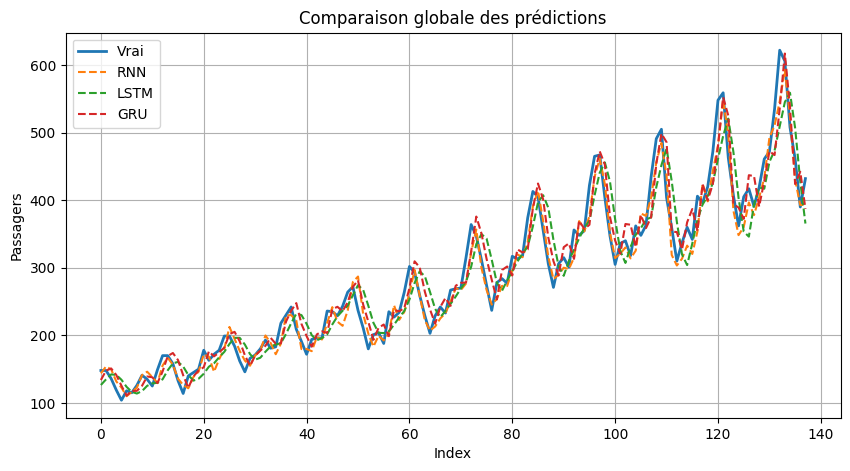

In [7]:
# Fonction d'affichage
def plot_prediction(y_true, y_pred, title):
    plt.figure(figsize=(10,4))
    plt.plot(y_true, label='Vrai')
    plt.plot(y_pred, label='Prédit')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Passagers')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_prediction(y_train_inv, pred_rnn_inv, 'Prédictions RNN vs Réel')
plot_prediction(y_train_inv, pred_lstm_inv, 'Prédictions LSTM vs Réel')
plot_prediction(y_train_inv, pred_gru_inv, 'Prédictions GRU vs Réel')

# Comparaison sur une même figure
plt.figure(figsize=(10,5))
plt.plot(y_train_inv, label='Vrai', linewidth=2)
plt.plot(pred_rnn_inv, label='RNN', linestyle='--')
plt.plot(pred_lstm_inv, label='LSTM', linestyle='--')
plt.plot(pred_gru_inv, label='GRU', linestyle='--')
plt.title("Comparaison globale des prédictions")
plt.xlabel("Index")
plt.ylabel("Passagers")
plt.grid(True)
plt.legend()
plt.show()


###  Prédictions vs Réel – Interprétation graphique

####  **1. RNN**

* Suit **très fidèlement** les données, même sur les pics.
* Très faible erreur visible.
*  **Risque de sur-ajustement** (le modèle pourrait mal généraliser sur des données futures ou bruitées).

####  **2. LSTM**

* **Lissage visible**, surtout sur les extrêmes (pics d’été / creux d’hiver).
* Manque de réactivité aux variations rapides.
*  Meilleure **stabilité**, probablement plus robuste sur du bruit ou en généralisation.

####  **3. GRU**

* Bon compromis : **forme globale bien suivie**, moins de lissage que LSTM.
* Moins précis que RNN mais **plus cohérent** sur le long terme.

####  **4. Comparaison globale**

* Toutes les courbes suivent bien la tendance principale et la saisonnalité.
* **RNN colle le plus aux données**, **LSTM est le plus lissé**, **GRU est entre les deux**.
* Les différences se voient **surtout sur les extrêmes (pics & creux)**.

---

###  Conclusion finale

| Critère             | RNN          | LSTM        | GRU       |
| ------------------- | ------------ | ----------- | --------- |
| Précision immédiate |  Très bonne |  Moyenne  |  Bonne  |
| Lissage             |  Aucun      |  Fort      |  Modéré |
| Robustesse          |  Faible     |  Élevée    |  Bonne  |
| Risque surfit       |  Élevé     |  Contrôlé |  Modéré |

**Choix recommandé pour production : GRU ou LSTM.**
**Choix pour meilleure précision brute : RNN, avec attention à la généralisation.**



## Partie 7: Bilan

###  **Objectif**

Prévoir le nombre de passagers aériens internationaux à partir d’une série temporelle mensuelle, en utilisant des réseaux de neurones récurrents : **RNN**, **LSTM**, **GRU**.

---

###  **Préparation**

* Série de 144 mois (1949–1960), avec une forte tendance et saisonnalité.
* Normalisation (MinMaxScaler) appliquée.
* Séquences de **6 mois pour prédire le 7e** créées via `TimeseriesGenerator`.

---

###  **Modélisation**

* Trois modèles construits : **Simple RNN**, **LSTM**, **GRU**.
* Deux couches récurrentes + 1 couche dense.
* Optimiseur Adam, perte MSE.

---

###  **Entraînement**

* **Early stopping** utilisé pour éviter l’overfitting.
* Pertes finales :

  * RNN : **0.00088**
  * GRU : **0.00326**
  * LSTM : **0.00586**

---

###  **Analyse des performances**

* **RNN** : très faible perte, prédictions proches, mais **risque de sur-ajustement** élevé.
* **GRU** : compromis solide, bonne généralisation, entraînement plus rapide que LSTM.
* **LSTM** : plus lent, plus lissé, mais **stable** et robuste.

---

###  **Visualisation**

* Les 3 modèles suivent bien la tendance et la saisonnalité.
* RNN suit parfaitement les pics → peut sur-apprendre.
* LSTM lisse trop les extrêmes.
* GRU équilibre précision et robustesse.

---

###  **Conclusion**

* **RNN** pour précision brute (à surveiller en test).
* **GRU** recommandé pour bon équilibre **vitesse / précision / généralisation**.
* **LSTM** pertinent si l’objectif est la **stabilité à long terme**.

